# Analyze CosMX data extracted from qupath-sptx2

In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import squidpy as sq
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table("../data/cosmx_lung5_rep2/singlecell.txt")
df.dropna(axis=1, how='all', inplace=True) # Remove columns of all NaN
df.dropna(inplace=True) # Drop rows containing NaN

In [3]:
df_adata = df[['Object ID']+df.columns[pd.Series(df.columns).str.startswith('cosmx:cell_transcript:')].tolist()]
df_adata.set_index("Object ID", inplace = True)
df_adata.columns = [t.replace('cosmx:cell_transcript:','') for t in df_adata.columns.tolist()]

In [4]:
df_adata

AATK  ABL1  ABL2  ACE  ACE2  ACKR1  \
Object ID                                                                  
319a1fdd-d77b-4815-bf1f-045eec367fd4   0.0   0.0   0.0  0.0   0.0    0.0   
fafc9a3e-dbfe-40b4-b6b0-217a13cceae4   0.0   0.0   0.0  0.0   0.0    0.0   
6c7e8003-9d5e-4667-8334-b15d746d5335   0.0   0.0   0.0  0.0   0.0    0.0   
cf3a655b-eb72-4c8e-bf53-0691e2c10979   0.0   0.0   0.0  0.0   0.0    0.0   
a24aef9d-e568-497f-9ffd-de5d03b283f4   0.0   0.0   0.0  0.0   0.0    0.0   
...                                    ...   ...   ...  ...   ...    ...   
78f26928-8a8c-48e0-9ae8-51713761f59f   0.0   0.0   0.0  0.0   0.0    0.0   
c2debda3-2076-4430-9128-e696d0cf95e5   0.0   0.0   0.0  0.0   0.0    0.0   
5d892653-816e-4a22-a9ba-9babe5379907   1.0   0.0   0.0  0.0   2.0    0.0   
0f43ee00-0f31-4596-88ff-69feeaafdf48   0.0   0.0   0.0  0.0   0.0    0.0   
3f4b1894-4fbf-4e00-9b9a-e9cbecf84259   0.0   0.0   0.0  0.0   0.0    0.0   

                                      ACKR3  ACKR4  ACTA2  ACTG2  ...  WNT5B  \
Object ID                                                         ...          
319a1fdd-d77b-4815-bf1f-045eec367fd4    0.0    0.0    0.0    0.0  ...    0.0   
fafc9a3e-dbfe-40b4-b6b0-217a13cceae4    0.0    0.0    0.0    0.0  ...    0.0   
6c7e8003-9d5e-4667-8334-b15d746d5335    0.0    0.0    0.0    0.0  ...    0.0   
cf3a655b-eb72-4c8e-bf53-0691e2c10979    0.0    0.0    0.0    0.0  ...    0.0   
a24aef9d-e568-497f-9ffd-de5d03b283f4    0.0    0.0    0.0    0.0  ...    0.0   
...                                     ...    ...    ...    ...  ...    ...   
78f26928-8a8c-48e0-9ae8-51713761f59f    0.0    0.0    0.0    0.0  ...    0.0   
c2debda3-2076-4430-9128-e696d0cf95e5    0.0    0.0    0.0    0.0  ...    0.0   
5d892653-816e-4a22-a9ba-9babe5379907    0.0    0.0    0.0    0.0  ...    0.0   
0f43ee00-0f31-4596-88ff-69feeaafdf48    0.0    0.0    0.0    0.0  ...    0.0   
3f4b1894-4fbf-4e00-9b9a-e9cbecf84259    0.0    0.0    0.0    0.0  ...    0.0   

                                      WNT7A  WNT7B  WNT9A  XBP1  XCL1  XCL2  \
Object ID                                                                     
319a1fdd-d77b-4815-bf1f-045eec367fd4    0.0    1.0    0.0   0.0   0.0   0.0   
fafc9a3e-dbfe-40b4-b6b0-217a13cceae4    0.0    0.0    0.0   0.0   0.0   0.0   
6c7e8003-9d5e-4667-8334-b15d746d5335    0.0    0.0    0.0   0.0   0.0   0.0   
cf3a655b-eb72-4c8e-bf53-0691e2c10979    0.0    1.0    0.0   1.0   1.0   0.0   
a24aef9d-e568-497f-9ffd-de5d03b283f4    0.0    0.0    2.0   0.0   0.0   0.0   
...                                     ...    ...    ...   ...   ...   ...   
78f26928-8a8c-48e0-9ae8-51713761f59f    1.0    0.0    0.0   0.0   0.0   0.0   
c2debda3-2076-4430-9128-e696d0cf95e5    0.0    1.0    3.0   0.0   0.0   0.0   
5d892653-816e-4a22-a9ba-9babe5379907    0.0    0.0    0.0   0.0   0.0   0.0   
0f43ee00-0f31-4596-88ff-69feeaafdf48    0.0    0.0    0.0   2.0   0.0   0.0   
3f4b1894-4fbf-4e00-9b9a-e9cbecf84259    0.0    0.0    0.0   0.0   0.0   0.0   

                                      YBX3  YES1  ZFP36  
Object ID                                                
319a1fdd-d77b-4815-bf1f-045eec367fd4   0.0   0.0    0.0  
fafc9a3e-dbfe-40b4-b6b0-217a13cceae4   0.0   0.0    0.0  
6c7e8003-9d5e-4667-8334-b15d746d5335   0.0   0.0    0.0  
cf3a655b-eb72-4c8e-bf53-0691e2c10979   1.0   0.0    1.0  
a24aef9d-e568-497f-9ffd-de5d03b283f4   0.0   0.0    0.0  
...                                    ...   ...    ...  
78f26928-8a8c-48e0-9ae8-51713761f59f   1.0   0.0    0.0  
c2debda3-2076-4430-9128-e696d0cf95e5   0.0   0.0    0.0  
5d892653-816e-4a22-a9ba-9babe5379907   0.0   0.0    0.0  
0f43ee00-0f31-4596-88ff-69feeaafdf48   1.0   0.0    0.0  
3f4b1894-4fbf-4e00-9b9a-e9cbecf84259   1.0   0.0    0.0  

[98282 rows x 960 columns]

In [5]:
adata = ad.AnnData(csr_matrix(df_adata.values), dtype=np.float32)
adata.obs_names = df_adata.index
adata.var_names = df_adata.columns
adata.obs.index = adata.obs.index.astype(str)
adata.obsm["spatial"] = df[['Centroid X µm','Centroid Y µm']].to_numpy()


# Calculate quality control metrics

Make the variable names unique using the method anndata.var_names_make_unique. Obtain the mitochondrial genes using their names prefixed with “mt-”. Calculate the quality control metrics on the anndata.AnnData using scanpy.pp.calculate_qc_metrics.

In [6]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"],percent_top=(50, 100, 200, 300), inplace=True)

In [7]:
adata

AnnData object with n_obs × n_vars = 98282 × 960
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

/opt/anaconda3/envs/st2/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


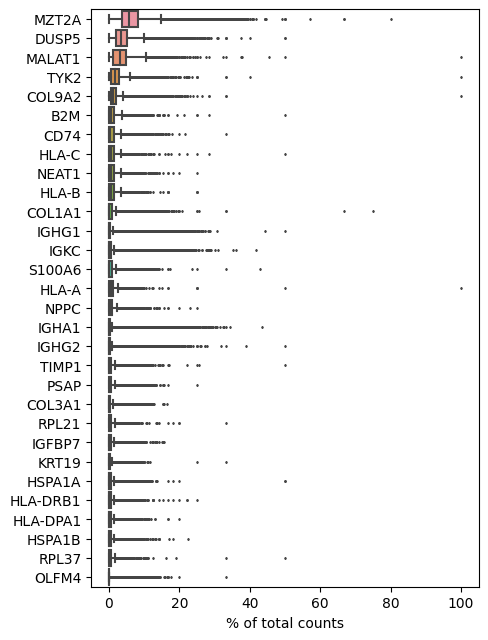

In [8]:
sc.pl.highest_expr_genes(adata, n_top=30)

Plot the “total_counts” and “n_genes_by_counts” from anndata.obs. The first subplot shows adata.obs["total_counts"], the second adata.obs["n_genes_by_counts"].

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

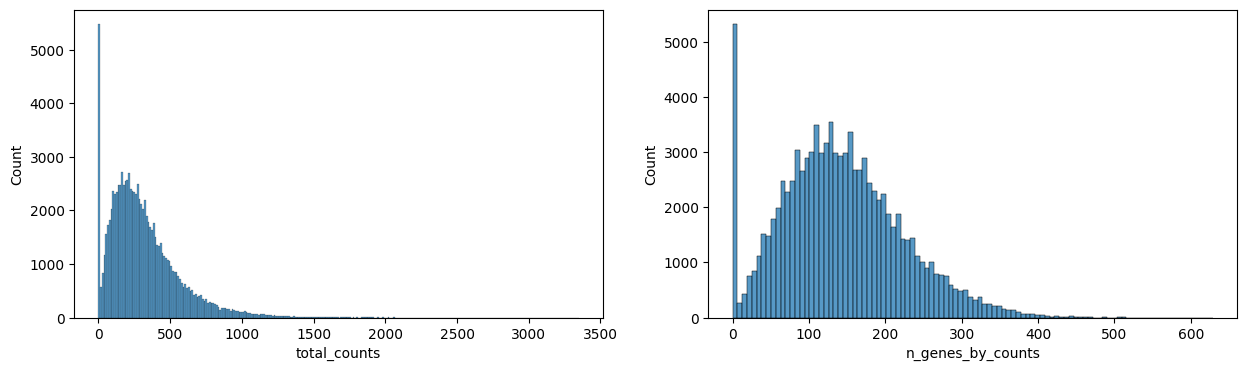

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
) # .set(xlim=(0, 20))
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    bins=100,
    ax=axs[1],
) # .set(xlim=(0, 20))

In [10]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=7)

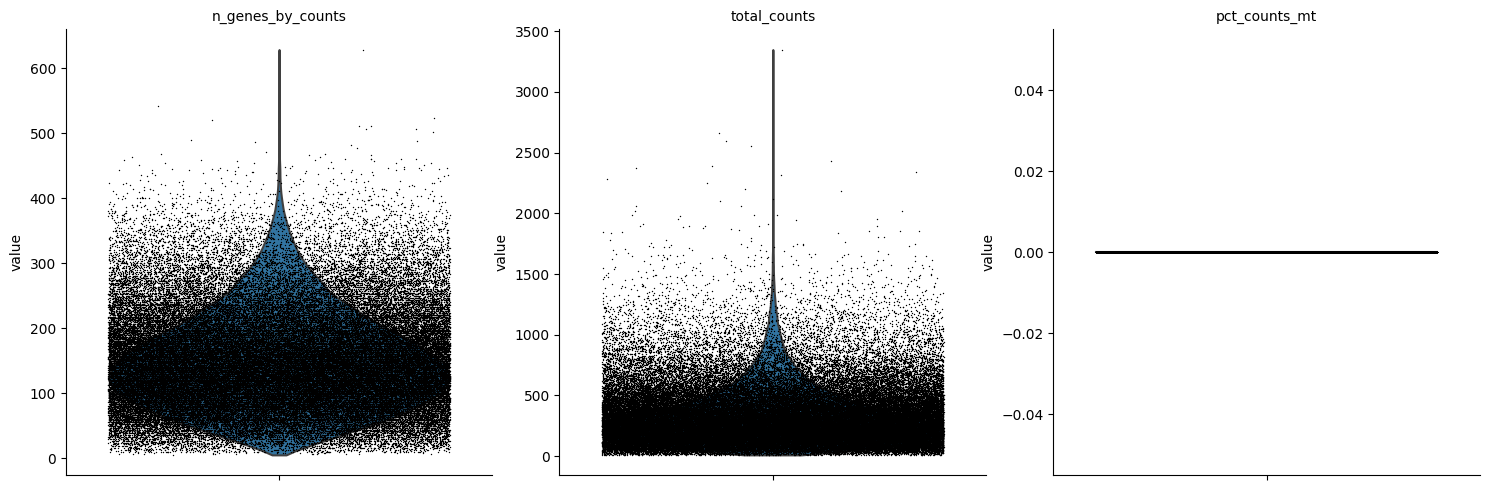

In [11]:
sc.pl.violin(
        adata,
        ["n_genes_by_counts", "total_counts",'pct_counts_mt'],
        jitter=0.4,
        multi_panel=True,
    )

In [12]:
# define outliers and do the filtering for the 3k dataset
adata.obs['outlier_total'] = adata.obs.total_counts > 1250
adata.obs['outlier_ngenes'] = adata.obs.n_genes_by_counts > 350

print('%u cells with large total counts' % (sum(adata.obs['outlier_total'])))
print('%u cells with large number of genes' % (sum(adata.obs['outlier_ngenes'])))

adata = adata[~adata.obs['outlier_total'], :]
adata = adata[~adata.obs['outlier_ngenes'], :]

597 cells with large total counts
1042 cells with large number of genes


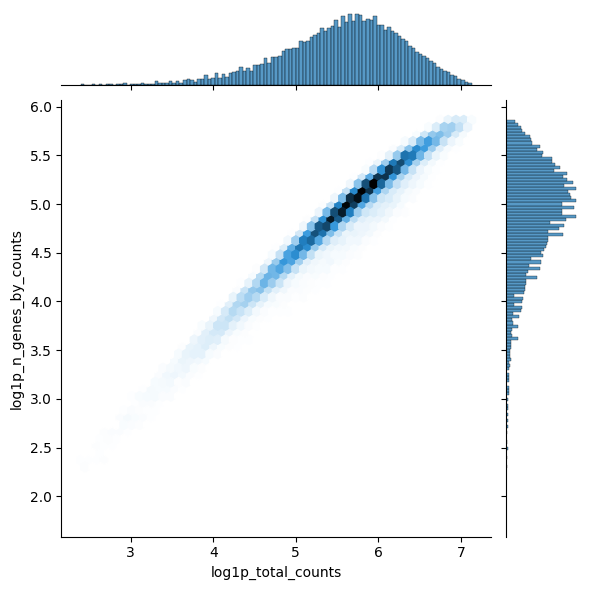

In [13]:
# sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
# sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
#
## Or, a better plot
#
sns.jointplot(
    data=adata.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

Normalize counts per cell using scanpy.pp.normalize_total.

In [14]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)

Logarithmize using scanpy.pp.log1p:

In [15]:
sc.pp.log1p(adata)

In [16]:
## If you don’t proceed below with correcting the data with sc.pp.regress_out and scaling it via sc.pp.scale, 
## you can also get away without using .raw at all.
## The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable
## and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. In that case, 
## the step actually do the filtering below is unnecessary, too.
#
# sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=50)
# sc.pl.highly_variable_genes(adata)
#
## Backup! as the rests in this block will drametically changes the dataset.
# adata.raw = adata
#
## Do not remove any highly_variable genes for now. This is Xenium data. You do not have much genes.
# adata = adata[:, adata.var.highly_variable]
#
## Regress out unwanted sources of variation using simple linear regression.
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
#
## scale will make the expression value to mean==0 and stddev==1. You probably do not want it for now.
# sc.pp.scale(adata, max_value=10)

Do principal component analysis, compute a neighborhood graph of the observations using  scanpy.pp.pca and scanpy.pp.neighbors respectively.

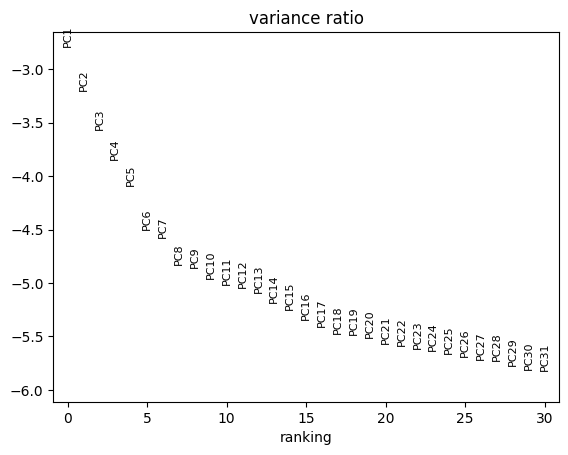

In [17]:
sc.pp.pca(adata)
sc.pl.pca_variance_ratio(adata, log=True)

In [18]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="subtype")

2023-04-07 11:46:29.427556: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 11:46:30.079783: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Visualize annotation on UMAP and spatial coordinates


Subplot with scatter plot in UMAP (Uniform Manifold Approximation and Projection) basis. The embedded points were colored, respectively, according to the total counts, number of genes by counts, and leiden clusters in each of the subplots. This gives us some idea of what the data looks like.

/opt/anaconda3/envs/st2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


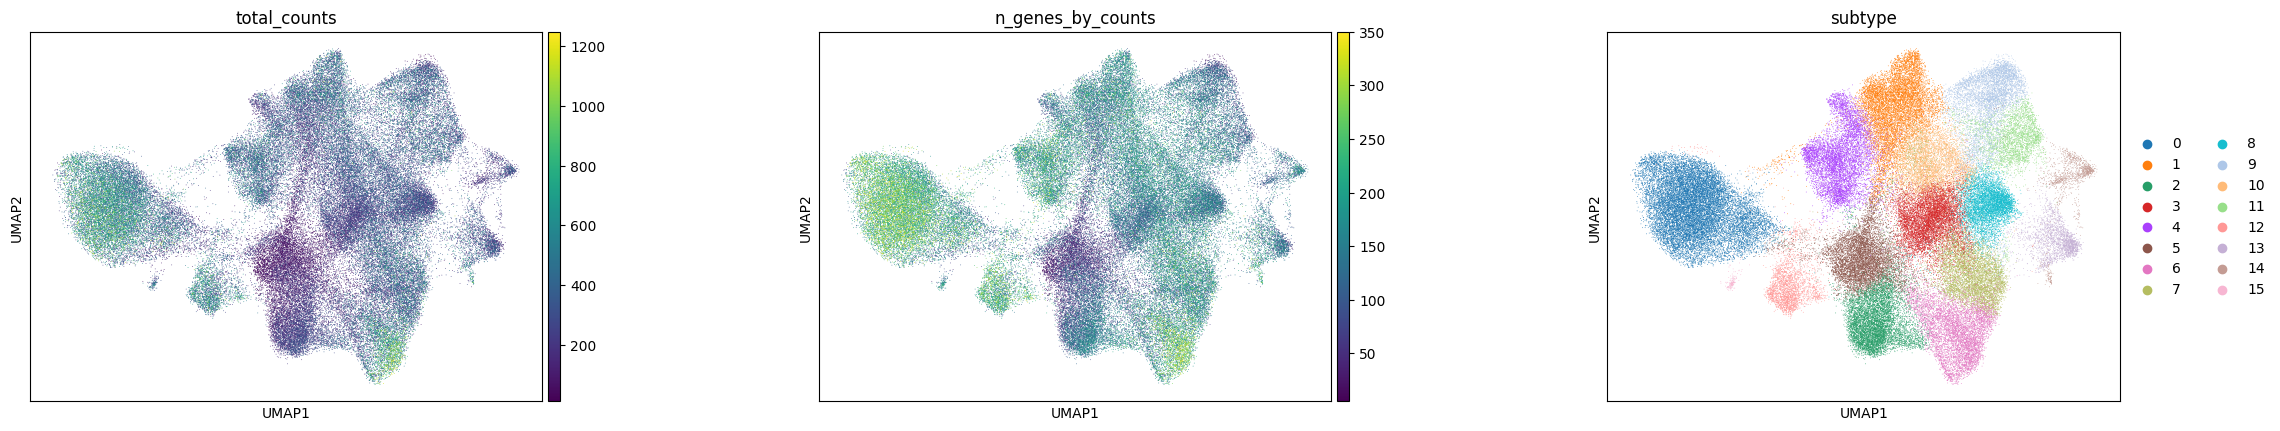

In [19]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "subtype",
    ],
    wspace=0.4,
)

/opt/anaconda3/envs/st2/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


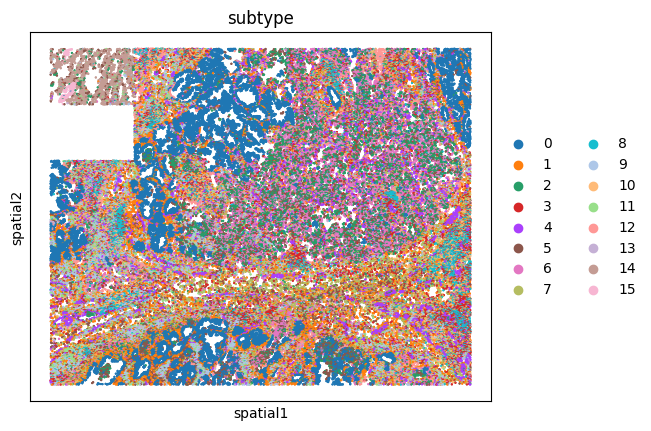

In [20]:
sq.pl.spatial_scatter(adata, library_id="spatial", shape=None,color=[
        "subtype",
    ],
    wspace=0.4,)

# Computation of spatial statistics

## Building the spatial neighbors graphs

This example shows how to compute centrality scores, given a spatial graph and cell type annotation.

The scores calculated are closeness centrality, degree centrality and clustering coefficient with the following properties: * closeness centrality - measure of how close the group is to other nodes. * clustering coefficient - measure of the degree to which nodes cluster together. * degree centrality - fraction of non-group members connected to group members.

All scores are descriptive statistics of the spatial graph.

This dataset contains Leiden cluster groups’ annotations in anndata.AnnData.obs, which are used for calculation of centrality scores.

First, we need to compute a connectivity matrix from spatial coordinates to calculate the centrality scores. We can use squidpy.gr.spatial_neighbors for this purpose. We use the coord_type="generic" based on the data and the neighbors are classified with Delaunay triangulation by specifying delaunay=True.

In [21]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

## Compute centrality scores

Centrality scores are calculated with squidpy.gr.centrality_scores, with the Leiden groups as clusters.

In [22]:
sq.gr.centrality_scores(adata, cluster_key="subtype")

The results were visualized by plotting the average centrality, closeness centrality, and degree centrality using squidpy.pl.centrality_scores.

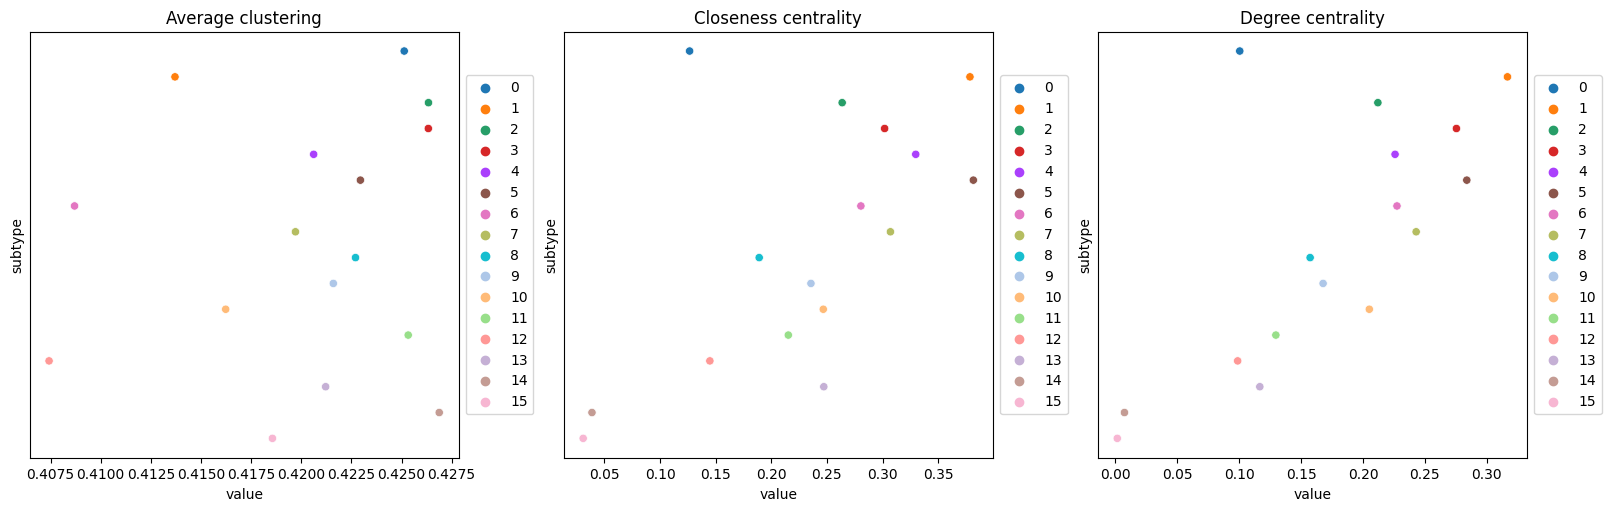

In [23]:
sq.pl.centrality_scores(adata, cluster_key="subtype", figsize=(16, 5))

## Compute co-occurrence probability

This example shows how to compute the co-occurrence probability.

The co-occurrence score is defined as:

 
where 
 is the conditional probability of observing a cluster 
 conditioned on the presence of a cluster 
, whereas 
 is the probability of observing 
 in the radius size of interest. The score is computed across increasing radii size around each cell in the tissue.

We can compute the co-occurrence score with squidpy.gr.co_occurrence. Results of co-occurrence probability ratio can be visualized with squidpy.pl.co_occurrence. The ‘3’ in the 
 
 represents a Leiden clustered group.

We can further visualize tissue organization in spatial coordinates with squidpy.pl.spatial_scatter, with an overlay of the expressed genes which were colored in consonance with the Leiden clusters.

In [24]:
adata_subsample = sc.pp.subsample(adata, fraction=0.5, copy=True)

  0%|          | 0/276 [00:00<?, ?/s]

/opt/anaconda3/envs/st2/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


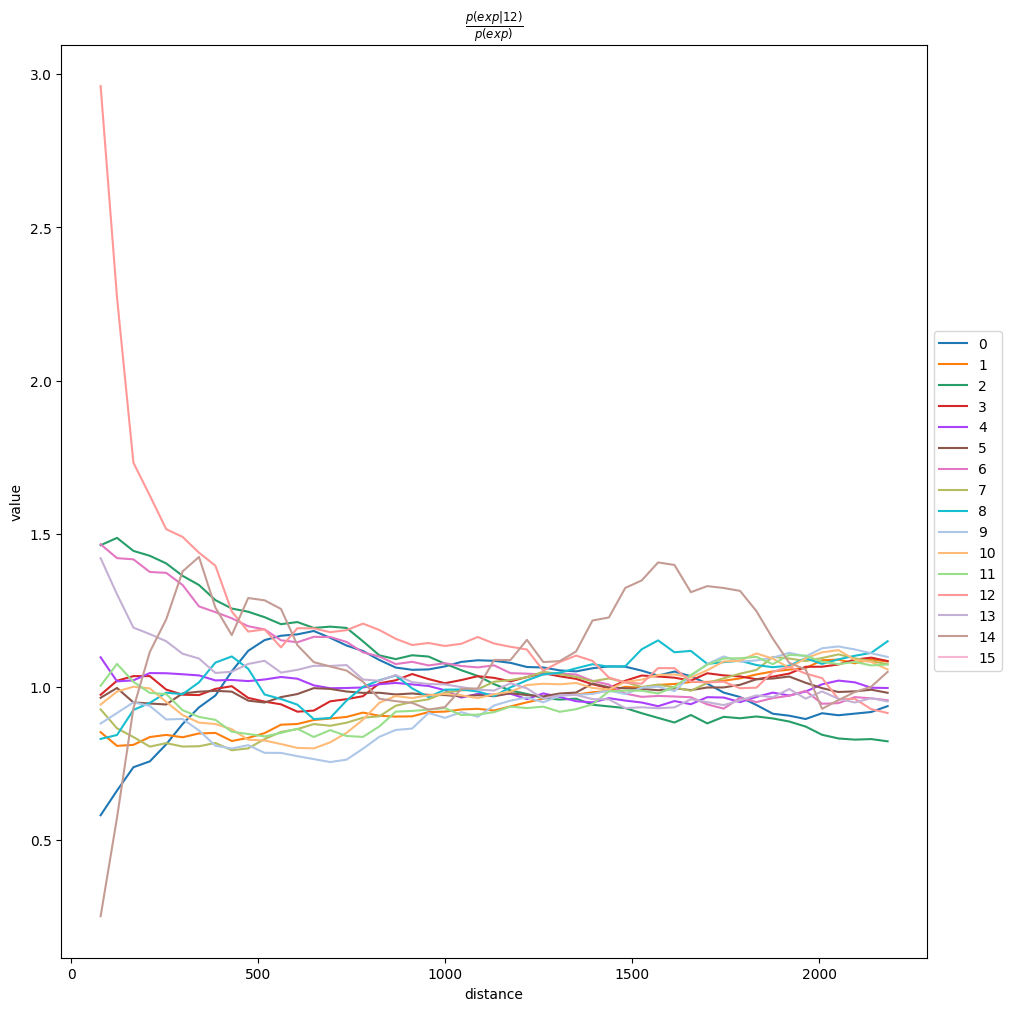

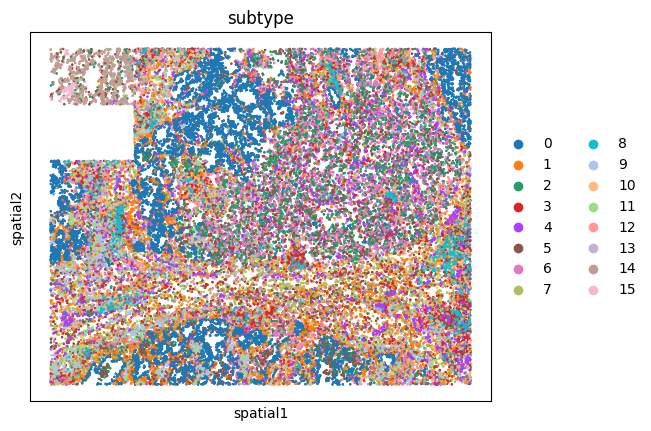

In [25]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="subtype",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="subtype",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="subtype",
    shape=None,
    size=2,
)

# Neighbors enrichment analysis

This example shows how to run the neighbors enrichment analysis routine.

It calculates an enrichment score based on proximity on the connectivity graph of cell clusters. The number of observed events is compared against 
 permutations and a z-score is computed.

This dataset contains cell type annotations in anndata.Anndata.obs which are used for calculation of the neighborhood enrichment. We calculate the neighborhood enrichment score with squidpy.gr.nhood_enrichment.

In [26]:
sq.gr.nhood_enrichment(adata, cluster_key="subtype")

  0%|          | 0/1000 [00:00<?, ?/s]

And visualize the results with squidpy.pl.nhood_enrichment.

/opt/anaconda3/envs/st2/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


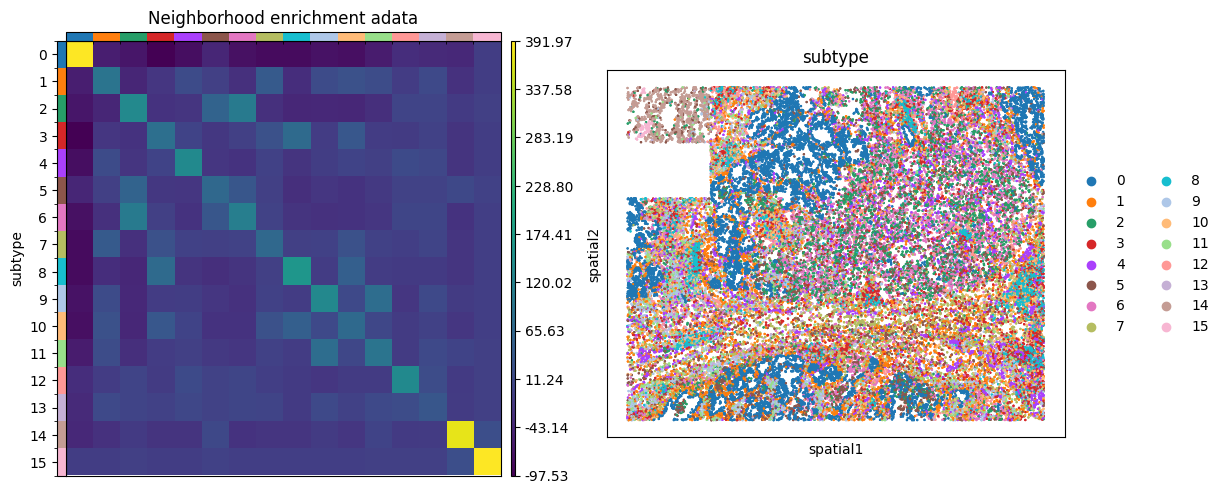

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="subtype",
    figsize=(8, 8),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="subtype", shape=None, size=2, ax=ax[1])

## Compute Moran’s I score

This example shows how to compute the Moran’s I global spatial auto-correlation statistics.

The Moran’s I global spatial auto-correlation statistics evaluates whether features (i.e. genes) shows a pattern that is clustered, dispersed or random in the tissue are under consideration.

We can compute the Moran’s I score with squidpy.gr.spatial_autocorr and mode = 'moran'. We first need to compute a spatial graph with squidpy.gr.spatial_neighbors. We will also subset the number of genes to evaluate.



In [28]:
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)
adata_subsample.uns["moranI"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
OLFM4    0.674123        0.0  0.000007         0.0  0.009901  0.000012   
KRT19    0.669666        0.0  0.000007         0.0  0.009901  0.000014   
CEACAM6  0.650702        0.0  0.000007         0.0  0.009901  0.000014   
S100A6   0.540597        0.0  0.000007         0.0  0.009901  0.000011   
KRT17    0.514514        0.0  0.000007         0.0  0.009901  0.000012   
MMP7     0.491542        0.0  0.000007         0.0  0.009901  0.000011   
TM4SF1   0.483812        0.0  0.000007         0.0  0.009901  0.000012   
KRT8     0.418476        0.0  0.000007         0.0  0.009901  0.000011   
EPCAM    0.408736        0.0  0.000007         0.0  0.009901  0.000010   
MMP1     0.378324        0.0  0.000007         0.0  0.009901  0.000009   

         pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
OLFM4                 0.0                0.0         0.012914  
KRT19                 0.0                0.0         0.012914  
CEACAM6               0.0                0.0         0.012914  
S100A6                0.0                0.0         0.012914  
KRT17                 0.0                0.0         0.012914  
MMP7                  0.0                0.0         0.012914  
TM4SF1                0.0                0.0         0.012914  
KRT8                  0.0                0.0         0.012914  
EPCAM                 0.0                0.0         0.012914  
MMP1                  0.0                0.0         0.012914

We can visualize some of those genes with squidpy.pl.spatial_scatter. We could also pass mode = 'geary' to compute a closely related auto-correlation statistic, Geary’s C. See squidpy.gr.spatial_autocorr for more information.

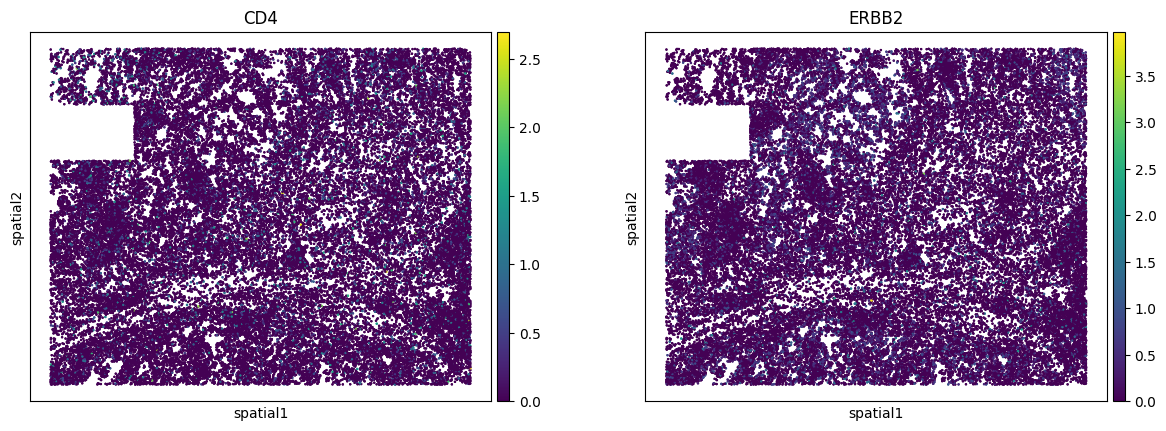

In [29]:
sq.pl.spatial_scatter(
    adata_subsample,
    library_id="spatial",
    color=[
        "CD4",
        "ERBB2",
    ],
    shape=None,
    size=2,
    img=False,
)

categories: 0, 1, 2, etc.
var_group_labels: 0, 1, 2


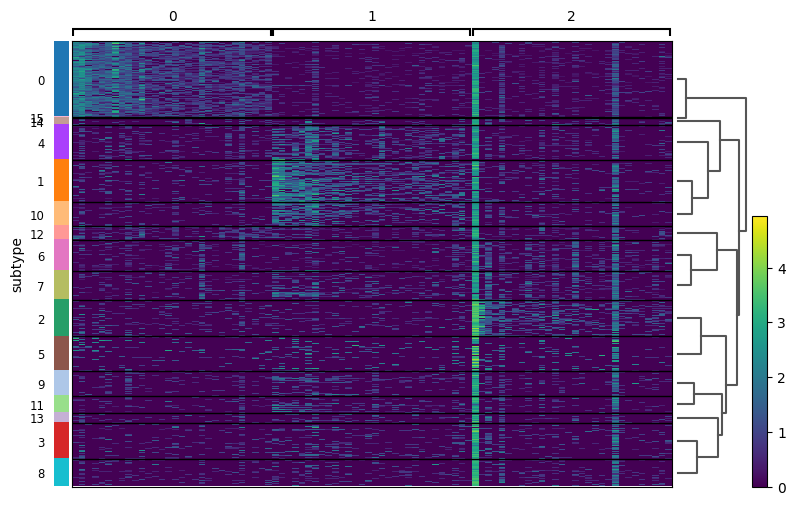

In [30]:
sc.tl.dendrogram(adata, groupby='subtype')
sc.tl.rank_genes_groups(adata, "subtype", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="012", n_genes=30, groupby="subtype")

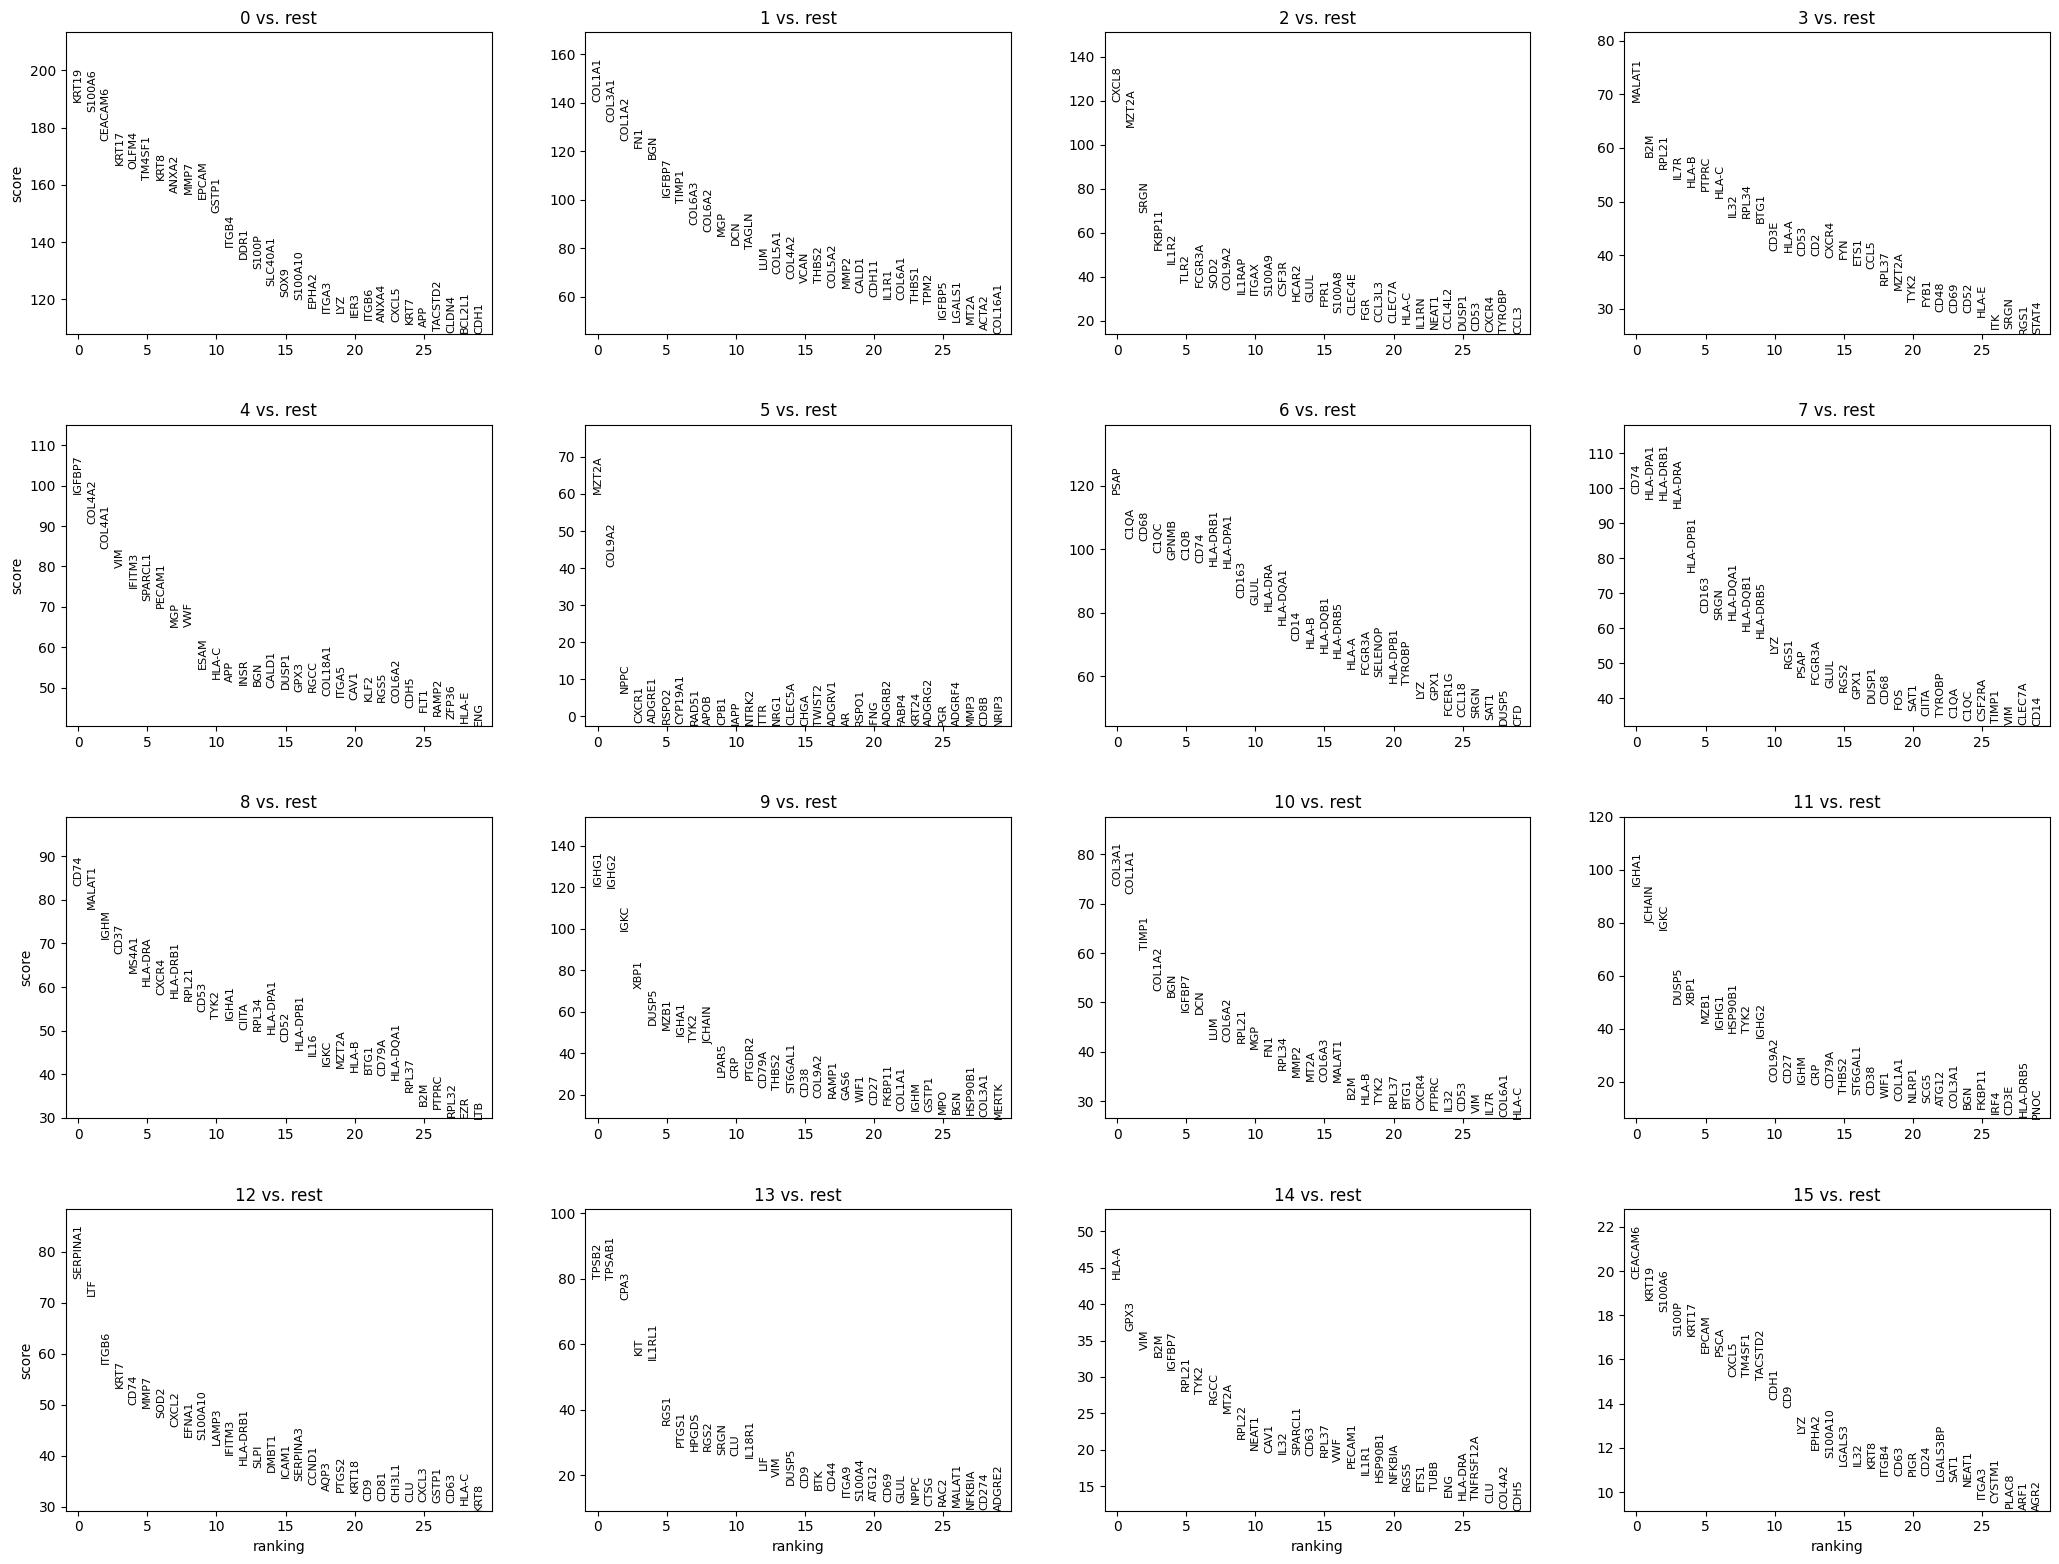

In [31]:
sc.tl.rank_genes_groups(adata, 'subtype', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False)

In [32]:
num = 2
marker_genes = list(set(np.array(pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(num)).reshape(-1)))
len(marker_genes)

26

/opt/anaconda3/envs/st2/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


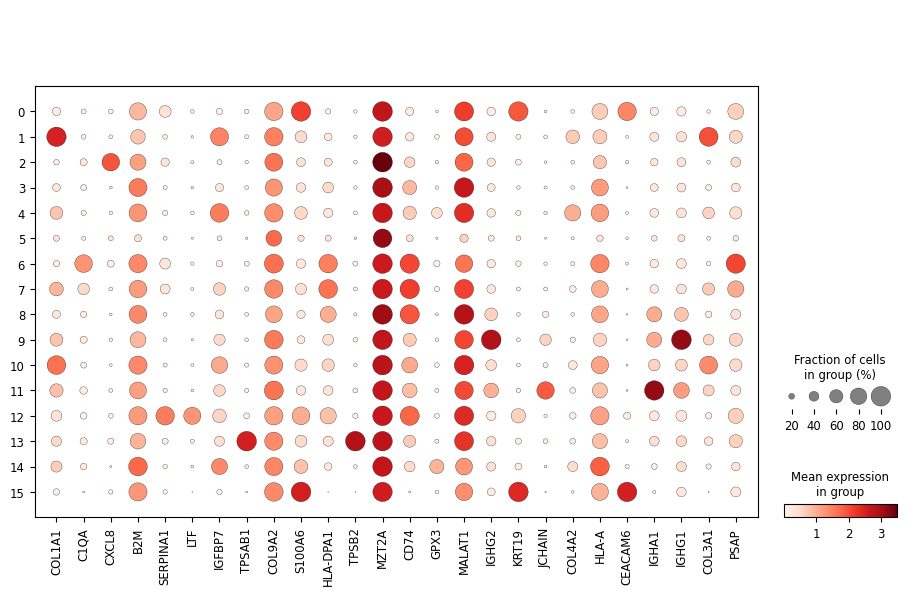

In [33]:
sc.pl.dotplot(adata, marker_genes, groupby='subtype');

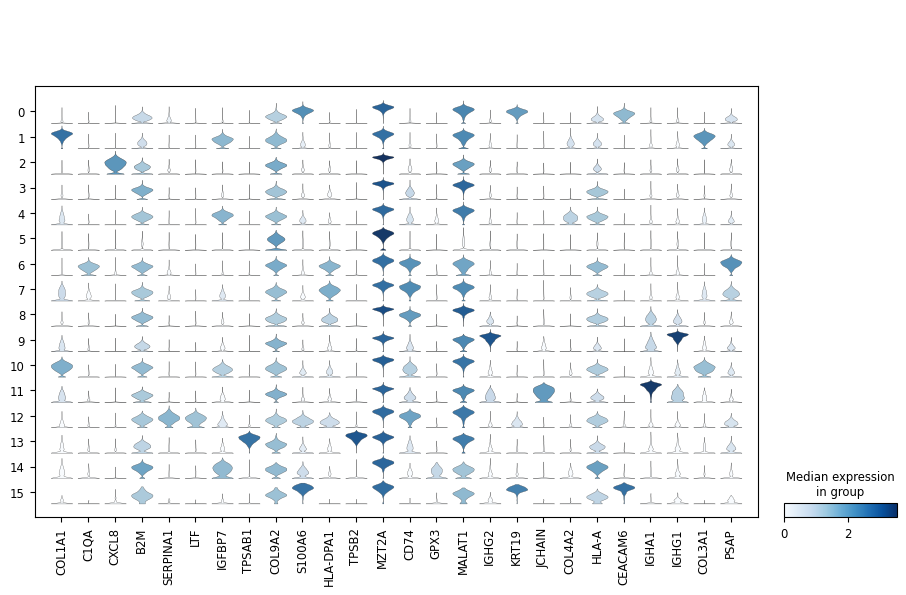

In [34]:
sc.pl.stacked_violin(adata, marker_genes, groupby='subtype', rotation=90);

In [35]:
adata.write_h5ad(filename="../data/cosmx_lung5_rep2/singlecell_normalized.h5ad", compression="gzip")

In [36]:
adata.obs.subtype.to_csv('../data/cosmx_lung5_rep2/cluster.csv')

In [37]:
# outputDf = adata.to_df()
# outputDf.insert(0, "subtypes", adata.obs['subtypes'])

In [38]:
# outputDf.to_csv("normalized_nucleus_singlecells.csv")